<a href="https://colab.research.google.com/github/pasticeta-hub/Investigaci-n-de-operaciones/blob/main/M%C3%A9todo%20de%20Galerkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [69]:
# Variables
x = sp.symbols('x')
u = sp.Function('u')

ode = -u(x).diff(x, x) + u(x) - x # Ecuacion
condiciones = {u(0): 0, u(1): 0} # Condiciones del problema

sol_exacta = sp.dsolve(ode, u(x), ics=condiciones)
u_exacta_expr = sol_exacta.rhs
sp.pprint(u_exacta_expr) # Esta es la solucion exaexacta

a1, a2, a3 = sp.symbols('alpha_1 alpha_2 alpha_3') # Aqui vemos los coeficientes

beta = sp.pi
func_1 = sp.sin(1 * beta * x)
func_2 = sp.sin(2 * beta * x)
func_3 = sp.sin(3 * beta * x)

u_approx = a1*func_1 + a2*func_2 + a3*func_3 # Hacemos una funcion para la conbinacion lineal

sp.pprint(u_approx)
# Error
R = -sp.diff(u_approx, x, 2) + u_approx - x
# Ecuaciones que se tienen  que resolver
ecuacion1 = sp.integrate(R * func_1, (x, 0, 1))
ecuacion2 = sp.integrate(R * func_2, (x, 0, 1))
ecuacion3 = sp.integrate(R * func_3, (x, 0, 1))

print(f"Eq 1: {ecuacion1} = 0")
print(f"Eq 2: {ecuacion2} = 0")
print(f"Eq 3: {ecuacion3} = 0")

# Soluciones del sistema
sol_alphas = sp.solve([ecuacion1, ecuacion2, ecuacion3], [a1, a2, a3])
sp.pprint(sol_alphas)

u_galerkin = u_approx.subs(sol_alphas)

print("Solucion")
sp.pprint(u_galerkin)

        x         -x 
     ℯ⋅ℯ       ℯ⋅ℯ   
x - ─────── + ───────
          2         2
    -1 + ℯ    -1 + ℯ 
α₁⋅sin(π⋅x) + α₂⋅sin(2⋅π⋅x) + α₃⋅sin(3⋅π⋅x)
Eq 1: alpha_1/2 + pi**2*alpha_1/2 - 1/pi = 0
Eq 2: alpha_2/2 + 2*pi**2*alpha_2 + 1/(2*pi) = 0
Eq 3: alpha_3/2 + 9*pi**2*alpha_3/2 - 1/(3*pi) = 0
⎧      2           -1               2     ⎫
⎪α₁: ──────, α₂: ────────, α₃: ───────────⎪
⎨         3             3                3⎬
⎪    π + π       π + 4⋅π       3⋅π + 27⋅π ⎪
⎩                                         ⎭
Solucion
2⋅sin(π⋅x)   sin(2⋅π⋅x)   2⋅sin(3⋅π⋅x)
────────── - ────────── + ────────────
       3             3              3 
  π + π       π + 4⋅π     3⋅π + 27⋅π  


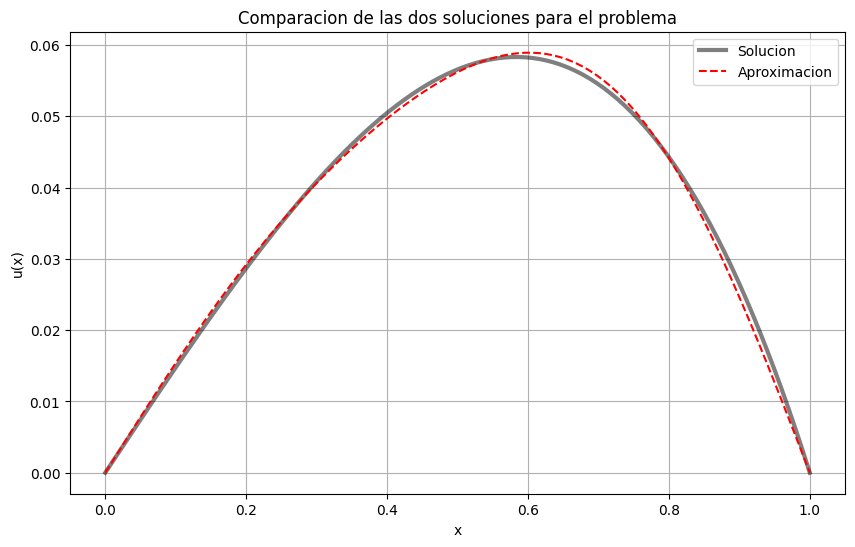

In [ ]:
# Graficas y error
f_exacta = sp.lambdify(x, u_exacta_expr, modules="numpy")
f_galerkin = sp.lambdify(x, u_galerkin, modules="numpy")

x_vals = np.linspace(0, 1, 100)
y_exacta = f_exacta(x_vals)
y_galerkin = f_galerkin(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_exacta, 'k-', linewidth=3, alpha=0.5, label='Solucion')
plt.plot(x_vals, y_galerkin, 'r--', linewidth=1.5, label=r'Aproximacion')

plt.title(r"Comparacion de las dos soluciones para el problema")
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.show()

error_max = np.max(np.abs(y_exacta - y_galerkin))
error_sq = (u_exacta_expr - u_galerkin)**2
error_l2 = sp.sqrt(sp.integrate(error_sq, (x, 0, 1))).evalf()

print(f"Error1: {error_max:.6e}")
print(f"Error2: {error_l2:.6e}")

El error con el metodo es bastante minimo, las lineas puntadas son extremadamente parecidas a la solucion, es un buen metodo y podemos ver que si viable